In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("data_inflation_adjusted.csv")
df = df.drop(columns=["Unnamed: 0"])
df["skilled"] = 0
df["skilled2"] = 0
df["isFinance"] = 0
ageGroup = np.linspace(25, 65, 9)
intervals = [pd.Interval(left=0, right=25)]
for i in range(1, len(ageGroup)):
    intervals.append(pd.Interval(left=ageGroup[i-1], right=ageGroup[i]))
intervals.append(pd.Interval(left=ageGroup[-1], right=np.inf))
ageRange = []
for i in range(len(df)):
    for interval in intervals:
        if df.iloc[i]["ageHead"] in interval:
            ageRange.append(interval)
    if df.iloc[i]["education"] == "postGraduate" or df.iloc[i]["education"] == "college":
        df.at[i,"skilled"] = 1
    if df.iloc[i]["education"] == "postGraduate":
        df.at[i,"skilled2"] = 1
    if df.iloc[i]["industry"] == 'finance':
        df.at[i,"isFinance"] = 1
df["ageRange"] = ageRange

In [3]:
# otherWealth is defined below.
df['otherWealth'] = df['wealthWithHomeEquity'] - df['annuityIRA'] - df['investmentAmount']

### 1. plot average income
### 2. plot investmentAmount of those who participate 
### 3. plot investmentAmount of everyone

In [22]:
ages = np.linspace(25, 65, 41)
spread = 10
ageIntervals = []
alpha = 0.1
for age in ages:
    ageIntervals.append(pd.Interval(left=age - spread, right=age + spread))

def weightedAverage(value, attribute):
    averageValues = []
    for interval in ageIntervals:
        collectedValues = []
        for i in range(len(value)):
            if value.at[i,"ageHead"] in interval:
                # Decide the weight of the those value to be 1- (1/(L+1))*abs(age-agePoint)
                collectedValues.append(value.at[i, attribute] * (1- (1/(spread+1))*np.abs(value.at[i,"ageHead"]-interval.mid)))
        averageValues.append(np.mean(collectedValues))
    return np.round(averageValues,3)

def smoothingPlot(df, title, ylabel, variable,group = ['skilled', 'isFinance']):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(16,10))
    fig.suptitle(title, fontsize=20)
    plt.xlabel('Age of the head', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    ax = fig.add_subplot(111)
    for group, value in df.groupby(group):
        value = value.reset_index()
        y = weightedAverage(value, variable)
        if group == (1,1):
            plt.plot(ages, y,'*-', label = "Skilled_Finance")
        elif group == (1,0):
            plt.plot(ages, y,'*-', label = "Skilled_nonFinance")
        elif group == (0,1):
            plt.plot(ages, y,'*-', label = "nonSkilled_Finance")
        else:
            plt.plot(ages, y,'*-', label = "nonSkilled_nonFinance")
    #     for i,j in zip(ages,y):
    #         ax.annotate(str(j),xy=(i,j))
    plt.legend(loc="upper left")
    
def smoothingPlot2(df, title, ylabel, variable,group = ['skilled']):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(16,10))
    fig.suptitle(title, fontsize=20)
    plt.xlabel('Age of the head', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    ax = fig.add_subplot(111)
    for group, value in df.groupby(group):
        value = value.reset_index()
        y = weightedAverage(value, variable)
        if group == 0:
            plt.plot(ages, y,'*-', label = "NoneSkilled")
        elif group == 1:
            plt.plot(ages, y,'*-', label = "Skilled")
    #     for i,j in zip(ages,y):
    #         ax.annotate(str(j),xy=(i,j))
    plt.legend(loc="upper left")
    
def smoothingPlot3(df, title, ylabel, variable,group = ['skilled', 'participation']):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(16,10))
    fig.suptitle(title, fontsize=20)
    plt.xlabel('Age of the head', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    ax = fig.add_subplot(111)
    for group, value in df.groupby(group):
        value = value.reset_index()
        y = weightedAverage(value, variable)
        if group == (1,1):
            plt.plot(ages, y,'*-', label = "Skilled_Participate")
        elif group == (1,0):
            plt.plot(ages, y,'*-', label = "Skilled_nonParticipate")
        elif group == (0,1):
            plt.plot(ages, y,'*-', label = "nonSkilled_Participate")
        else:
            plt.plot(ages, y,'*-', label = "nonSkilled_nonParticipate")
    #     for i,j in zip(ages,y):
    #         ax.annotate(str(j),xy=(i,j))
    plt.legend(loc="upper left")

# Investment Ratio with different definition of skilled

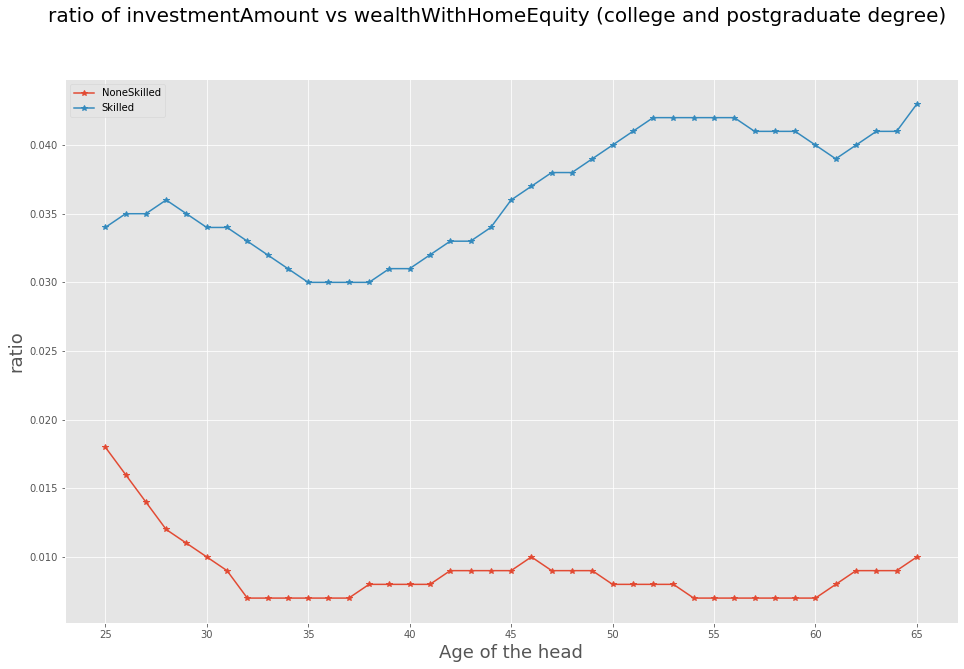

In [18]:
ndf = df[df.wealthWithHomeEquity > 0]
ndf['ratio'] = ndf.investmentAmount / ndf.wealthWithHomeEquity
smoothingPlot2(ndf, "ratio of investmentAmount vs wealthWithHomeEquity (college and postgraduate degree)", 
              "ratio", "ratio",group = ['skilled'])

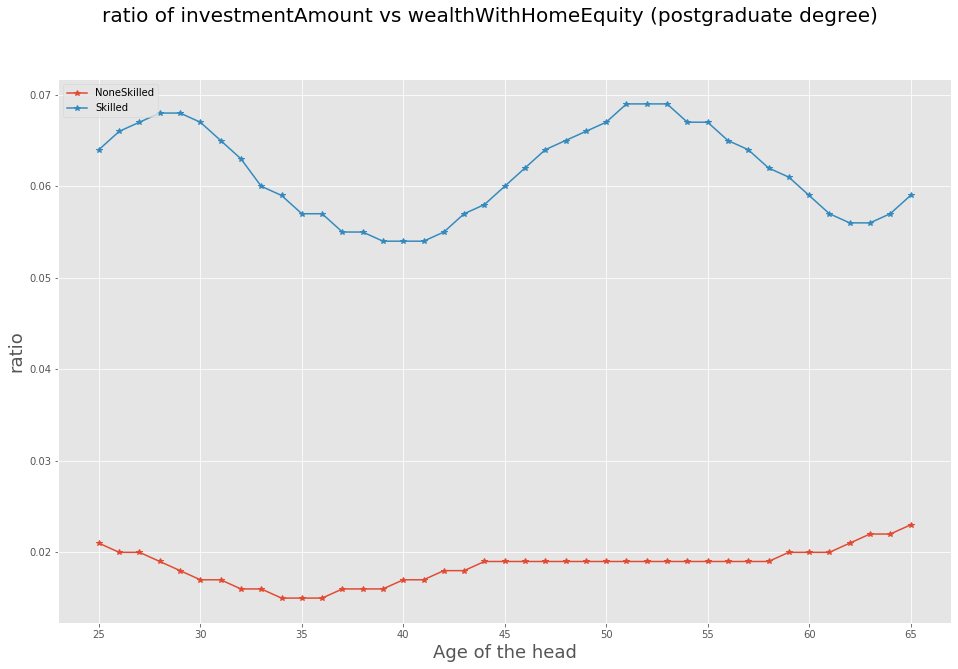

In [17]:
smoothingPlot2(ndf, "ratio of investmentAmount vs wealthWithHomeEquity (postgraduate degree)", 
               "ratio", "ratio",group = ['skilled2'])

# total wealth with different definition of skilled

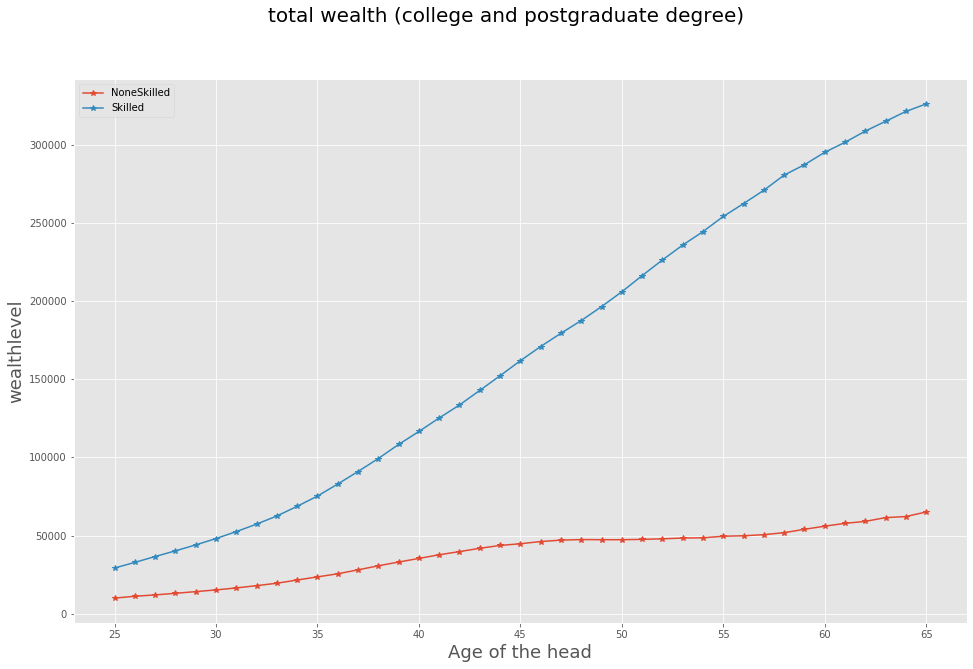

In [26]:
smoothingPlot2(df, "total wealth (college and postgraduate degree)", 
              "wealthlevel", "wealthWithHomeEquity",group = ['skilled'])

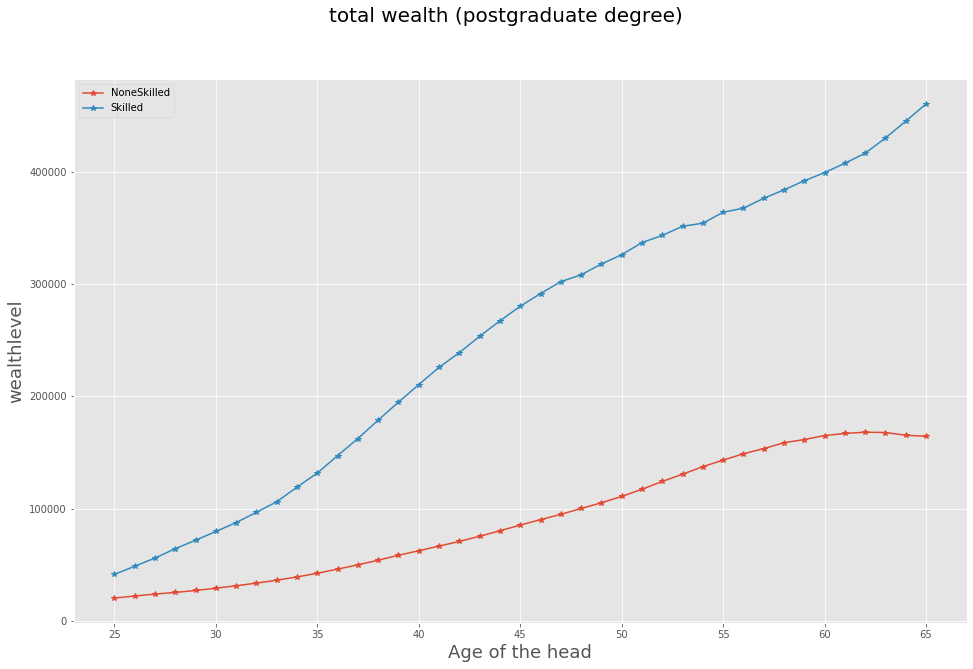

In [27]:
smoothingPlot2(df, "total wealth (postgraduate degree)", 
               "wealthlevel", "wealthWithHomeEquity",group = ['skilled2'])

# total wealth with different definition of skilled and participation

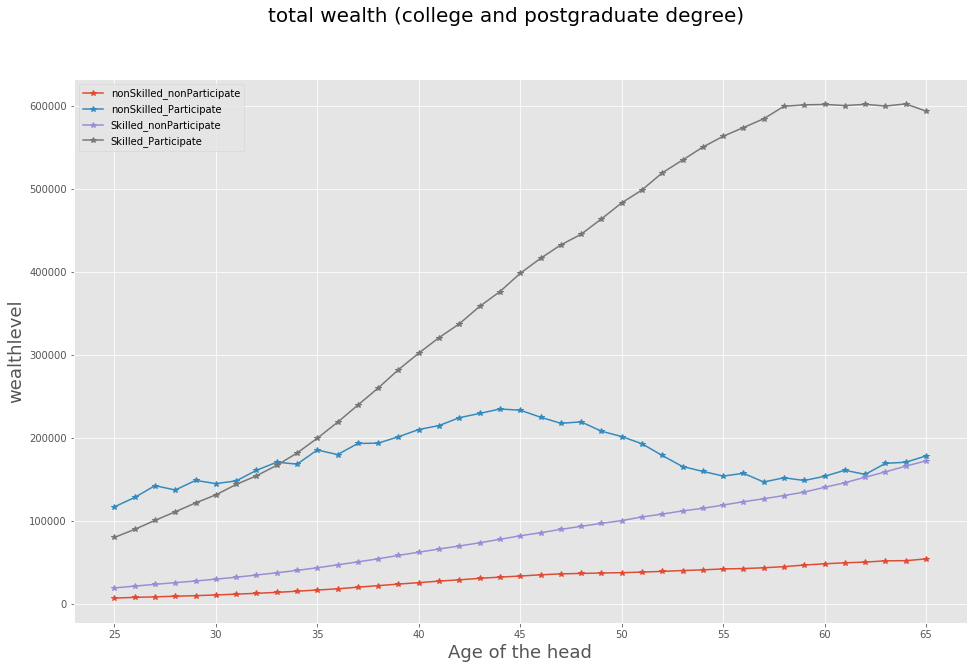

In [28]:
smoothingPlot3(df, "total wealth (college and postgraduate degree)", 
               "wealthlevel", "wealthWithHomeEquity",group = ['skilled', 'participation'])

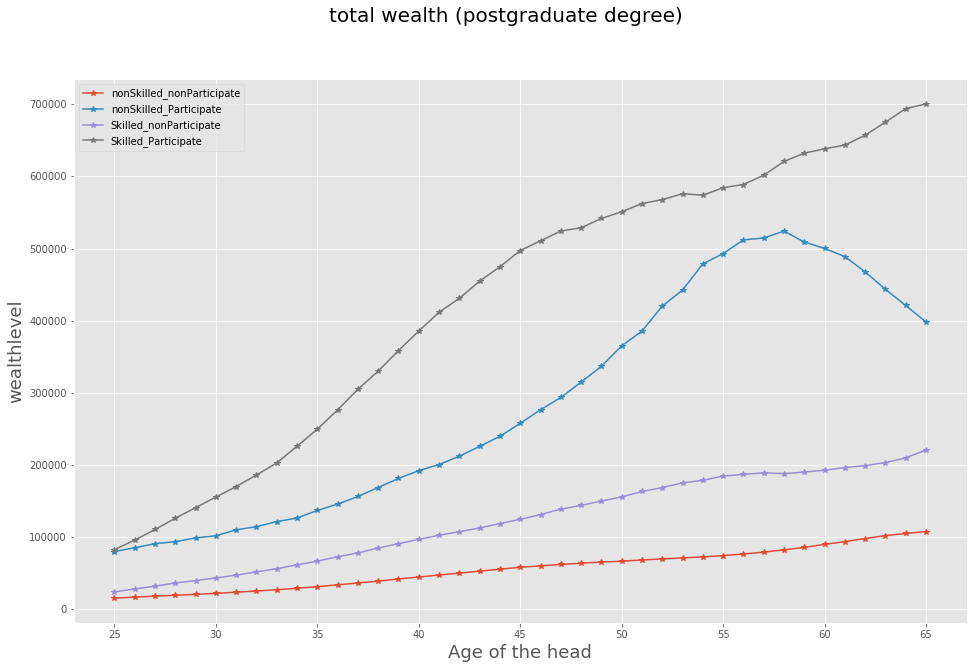

In [29]:
smoothingPlot3(df, "total wealth (postgraduate degree)", 
               "wealthlevel", "wealthWithHomeEquity",group = ['skilled2', 'participation'])